In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available : ", len(physical_devices))

Num GPUs Available :  1


In [6]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

example tarining images and their labels :[6, 9, 9, 4, 1, 1, 2, 7, 8, 3]
corresponding classes for the labels :['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat']


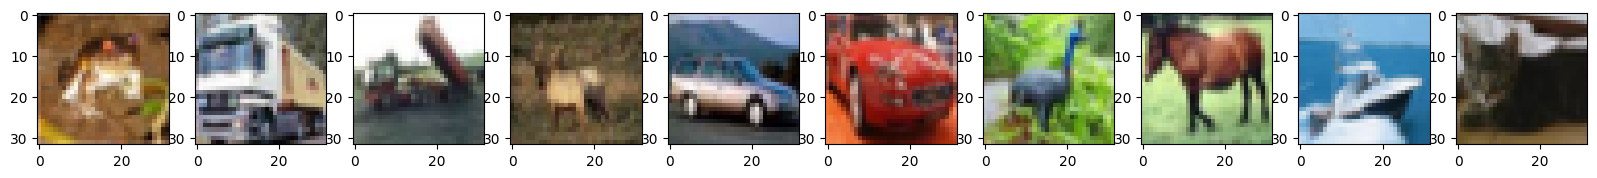

In [7]:
cifar10_classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print('example tarining images and their labels :' + str([x[0] for x in y_train[0:10]]))
print('corresponding classes for the labels :' +str([cifar10_classes[x[0]] for x in y_train[0:10]]))

fig,axarr = plt.subplots(1,10)
fig.set_size_inches(20,6)

for i in range(10):
    image = x_train[i]
    axarr[i].imshow(image)
plt.show()

In [8]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [9]:
x_train = x_train/ 255.0
x_test = x_test/ 255.0

In [10]:
from tensorflow import keras
from keras.layers import Dense
from keras.layers import Flatten

In [11]:
ann = keras.Sequential()
ann.add(Flatten(input_shape=(32,32,3)))
ann.add(Dense(2048,activation='relu'))
ann.add(Dense(10,activation='softmax'))

In [12]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 2048)              6293504   
                                                                 
 dense_1 (Dense)             (None, 10)                20490     
                                                                 
Total params: 6,313,994
Trainable params: 6,313,994
Non-trainable params: 0
_________________________________________________________________


In [13]:
ann.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
history = ann.fit(x_train, y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 20s 9ms/step - loss: 1.9095 - accuracy: 0.3308 - val_loss: 1.7028 - val_accuracy: 0.3938
Epoch 2/10
1563/1563 [==============================] - 13s 9ms/step - loss: 1.6857 - accuracy: 0.3980 - val_loss: 1.6380 - val_accuracy: 0.4090
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6137 - accuracy: 0.4251 - val_loss: 1.5841 - val_accuracy: 0.4376
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5690 - accuracy: 0.4427 - val_loss: 1.5521 - val_accuracy: 0.4519
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5324 - accuracy: 0.4555 - val_loss: 1.5391 - val_accuracy: 0.4562
Epoch 6/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.5067 - accuracy: 0.4643 - val_loss: 1.5760 - val_accuracy: 0.4404
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4880 - accuracy: 0.4710 - val_loss: 1.5012 - val_a

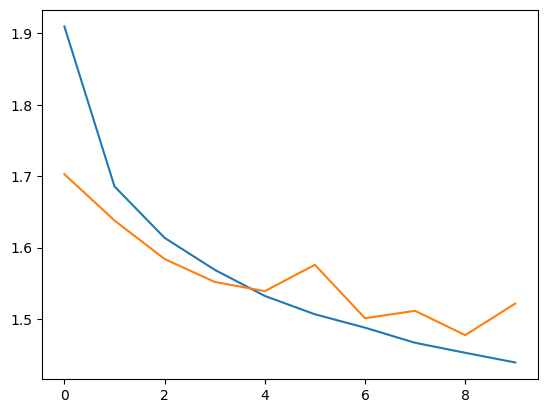

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [16]:
from tensorflow import keras
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout

In [17]:
cnn = keras.Sequential()
cnn.add(Conv2D(32, kernel_size = (3,3), strides=(1,1), padding='same', activation='relu', input_shape= (32,32,3)))
cnn.add(MaxPooling2D(2,2))
cnn.add(Conv2D(64, kernel_size = (3,3), strides=(1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D(2,2))
cnn.add(Conv2D(128, kernel_size = (3,3), strides=(1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D(2,2))
cnn.add(Conv2D(256, kernel_size = (3,3), strides=(1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D(2,2))
cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(Dense(10,activation='softmax'))

In [18]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)       

In [19]:
cnn.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = cnn.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 39s 14ms/step - loss: 1.5784 - accuracy: 0.4206 - val_loss: 1.2023 - val_accuracy: 0.5698
Epoch 2/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.1209 - accuracy: 0.6078 - val_loss: 0.9433 - val_accuracy: 0.6696
Epoch 3/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.9233 - accuracy: 0.6823 - val_loss: 0.8404 - val_accuracy: 0.7135
Epoch 4/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7850 - accuracy: 0.7294 - val_loss: 0.8193 - val_accuracy: 0.7191
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.6937 - accuracy: 0.7611 - val_loss: 0.7907 - val_accuracy: 0.7357
Epoch 6/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.6104 - accuracy: 0.7915 - val_loss: 0.7921 - val_accuracy: 0.7390
Epoch 7/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.5396 - accuracy: 0.8145 - val_loss: 0.7835 -

In [20]:
def plotLosses(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','validation'], loc='upper right')
    plt.show()

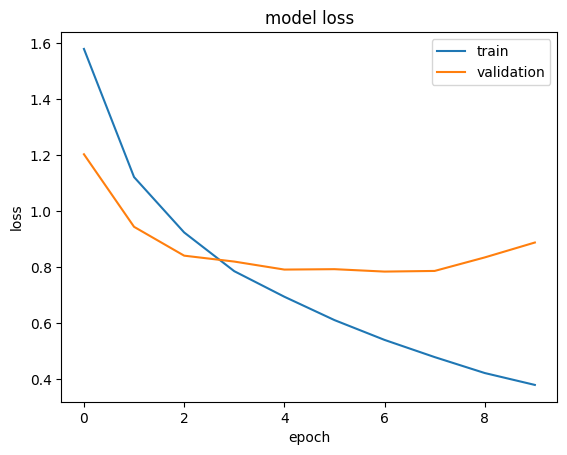

In [21]:
plotLosses(history)

In [22]:
def plotAccuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','validation'], loc='upper left')

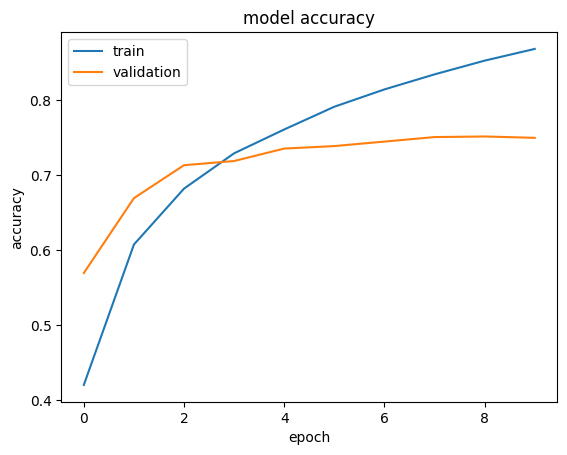

In [23]:
plotAccuracy(history)

In [24]:
score = cnn.evaluate(x_test,y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.8873 - accuracy: 0.7500


In [25]:
print(cnn.metrics_names)
print(score)

['loss', 'accuracy']
[0.8872833847999573, 0.75]


In [26]:
from keras.models import load_model
cnn.save('cnn_model.h5')

In [ ]:
model = tf.keras.models.load_model('cnn_model.h5')


Traceback (most recent call last):
  File "c:\Users\ASUS\.vscode\extensions\ms-python.python-2024.20.0-win32-x64\python_files\python_server.py", line 130, in exec_user_input
    retval = callable_(user_input, user_globals)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<string>", line 1, in <module>
NameError: name 'tf' is not defined



In [ ]:
import numpy as np
x_test_sample = np.expand_dims(x_test[20],axis=0)